In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("amazon.csv")

In [3]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
print(df.describe())

        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B08WRWPM22  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

In [6]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [7]:
print(df.columns.tolist())

['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [8]:
import pandas as pd
df = pd.read_csv("amazon.csv")
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [9]:
print(df.describe())
print(df['category'].unique())

        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B08WRWPM22  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

In [10]:
top_expensive = df.sort_values(by='actual_price', ascending=False).head(10)
print(top_expensive[['product_name', 'actual_price']])

                                           product_name actual_price
653   STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...         ₹999
88    Lapster 65W compatible for OnePlus Dash Warp C...         ₹999
567   Prolet Classic Bumper Case Cover for Samsung G...         ₹999
963   Orico 2.5"(6.3cm) USB 3.0 HDD Enclosure Case C...         ₹999
962   Sounce Gold Plated 3.5 mm Headphone Splitter f...         ₹999
584   boAt BassHeads 100 in-Ear Wired Headphones wit...         ₹999
347   JBL C100SI Wired In Ear Headphones with Mic, J...         ₹999
938   Lapster 1.5 mtr USB 2.0 Type A Male to USB A M...         ₹999
1370  KONVIO NEER 10 Inch Spun Filter (PP SPUN) Cart...         ₹999
923   AirCase Protective Laptop Bag Sleeve fits Upto...         ₹999


In [11]:
print(df['discount_percentage'].head())
print(df['discount_percentage'].dtype)

0    64%
1    43%
2    90%
3    53%
4    61%
Name: discount_percentage, dtype: object
object


In [13]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')


In [14]:
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

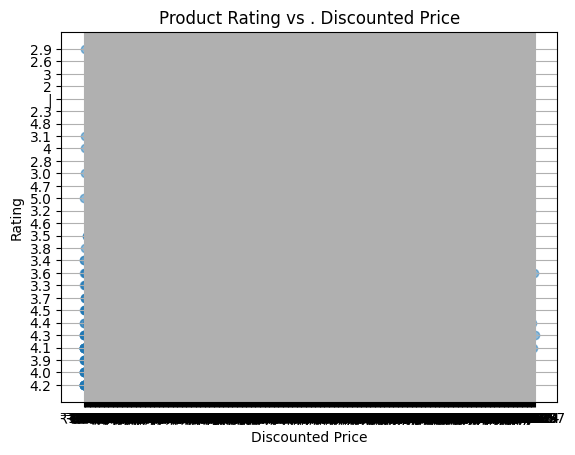

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df['discounted_price'], df['rating'], alpha=0.5)
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Product Rating vs . Discounted Price')
plt.grid(True)
plt.show()

In [17]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [18]:
top_rated = df[df['rating'] >= 4.5].sort_values(by='discounted_price')
print(top_rated[['product_name', 'discounted_price', 'rating']].head(10))

                                           product_name discounted_price  \
98    TP-Link UE300 USB 3.0 to RJ45 Gigabit Ethernet...           ₹1,099   
1399  Cafe JEI French Press Coffee and Tea Maker 600...           ₹1,099   
937   TP-Link UE300C USB Type-C to RJ45 Gigabit Ethe...           ₹1,199   
917   ESR Screen Protector Compatible with iPad Pro ...           ₹1,234   
970   Belkin Essential Series 4-Socket Surge Protect...           ₹1,289   
886   Logitech M331 Silent Plus Wireless Mouse, 2.4G...           ₹1,295   
637   Casio FX-991ES Plus-2nd Edition Scientific Cal...           ₹1,295   
751   SanDisk Extreme microSD UHS I Card 128GB for 4...           ₹1,329   
866   Lenovo 600 Bluetooth 5.0 Silent Mouse: Compact...           ₹1,439   
1145  Swiffer Instant Electric Water Heater Faucet T...           ₹1,439   

      rating  
98       4.5  
1399     4.5  
937      4.5  
917      4.5  
970      4.5  
886      4.6  
637      4.5  
751      4.5  
866      4.5  
1145     4.8 

C:\Users\Uday\AppData\Local\Temp\ipykernel_5104\1683214552.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


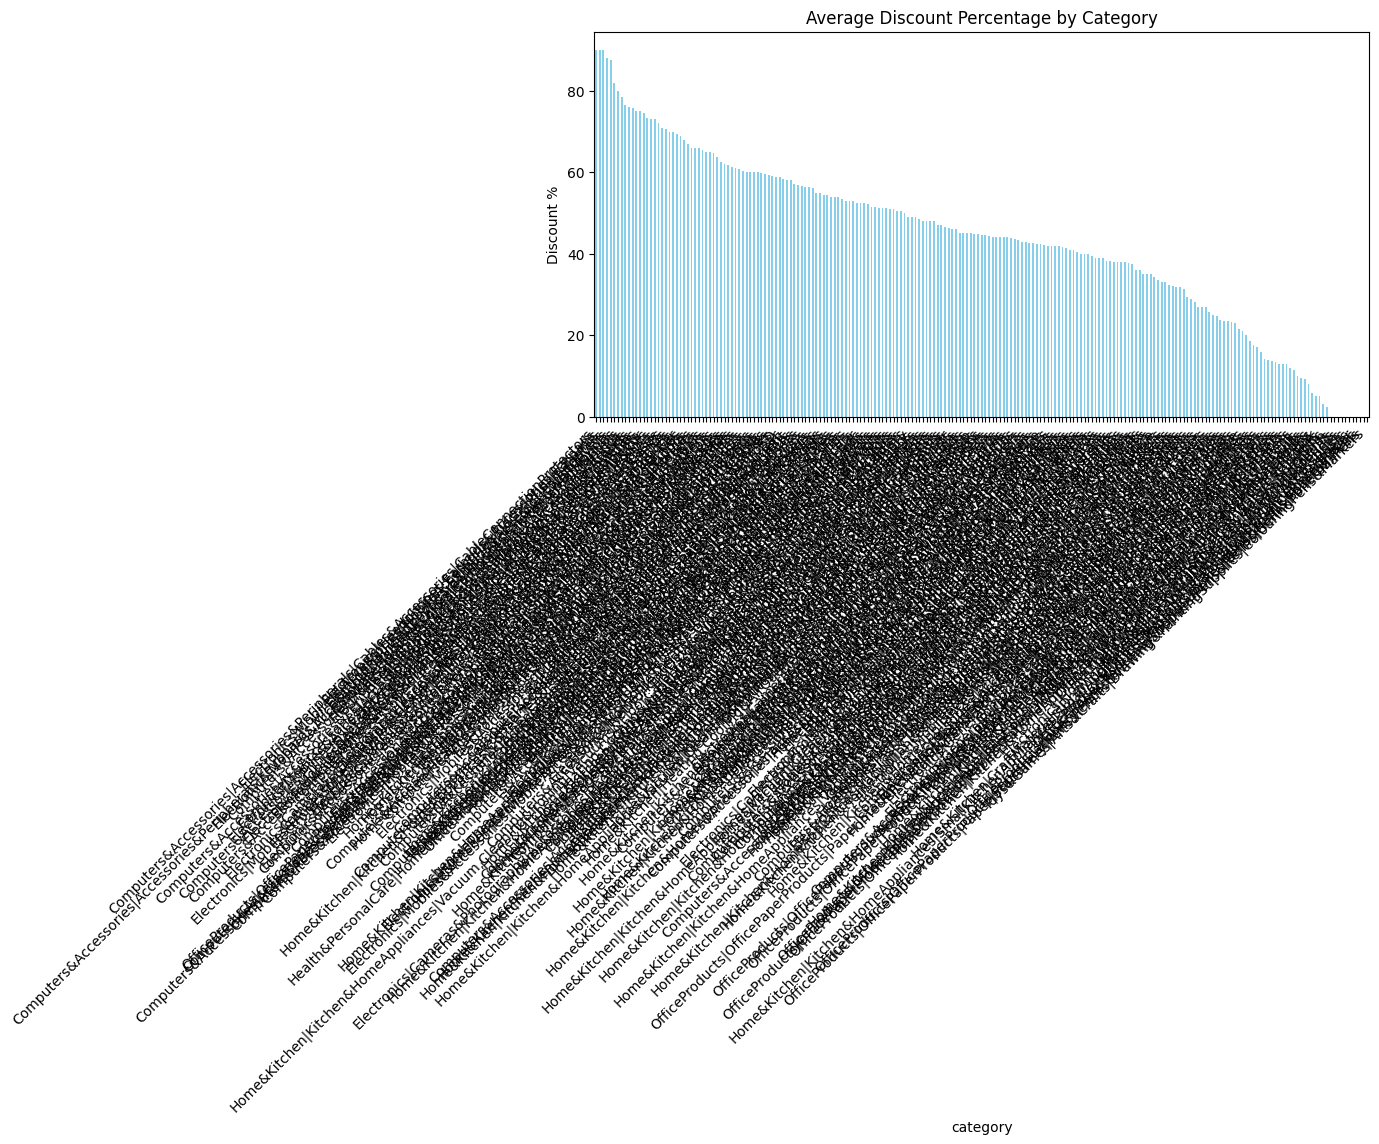

In [19]:
import matplotlib.pyplot as plt

avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_discount.plot(kind='bar', color='skyblue')
plt.title('Average Discount Percentage by Category')
plt.ylabel('Discount %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()